In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os

In [2]:
%%time
BES_data_folder = "../BES_analysis_data/"
BES_code_folder = "../BES_analysis_code/"
BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta")

Wall time: 10min 13s


In [3]:
import holoviews as hv
hv.notebook_extension()

In [ ]:
## Relevant BES variables for 2015 Campaign

# CampaignDayW5
# wt_daily_W5
# enddateW5 (formatted)

In [4]:
# underlying total distribution of Most Important Issue responses
BES_Panel["miilabelW5"].value_counts()

economy general         7100
immigration             6110
nhs                     3548
Don't know              2444
services-spending       1177
social inequalities      935
poverty, living stds     838
election outcome         648
housing                  602
unemployment             564
environment              477
No problem               437
terrorism                427
politics-neg             402
europe                   377
education                252
consumer debt            233
international probs      157
welfare fraud            115
crime                    111
taxation                  90
national security         87
pensions                  55
scot const                45
inflation                 17
iraq war                   9
constitutional             8
civil liberties            5
youth                      4
aging population           1
flooding                   1
class difference           1
Name: miilabelW5, dtype: int64

In [5]:
# sample size on each day (mean ~810)
BES_Panel["CampaignDayW5"].value_counts().sort_index()

1.0      796
2.0      974
3.0      987
4.0      910
5.0      885
6.0      762
7.0      776
8.0      792
9.0      890
10.0     667
11.0     745
12.0     672
13.0     638
14.0     757
15.0     829
16.0     785
17.0     716
18.0     771
19.0     635
20.0     633
21.0     805
22.0     826
23.0     785
24.0     439
25.0    1003
26.0     708
27.0     741
28.0     725
29.0     844
30.0     933
31.0     886
32.0     927
33.0     804
34.0     930
35.0     892
36.0    1016
37.0    1048
38.0     882
Name: CampaignDayW5, dtype: int64

In [6]:
# actual crosstabs of campaign day vs MII
crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW5' ],
                       columns = BES_Panel[ "miilabelW5" ],
                       values  = BES_Panel[ "wt_daily_W5" ],
                       aggfunc = sum,
                       normalize='index')
crosstab

miilabelW5,No problem,unemployment,nhs,immigration,economy general,international probs,politics-neg,housing,"poverty, living stds",services-spending,...,civil liberties,class difference,taxation,pensions,youth,inflation,flooding,iraq war,constitutional,Don't know
CampaignDayW5,,,,,,,,,,,,,,,,,,,,,
1.0,0.021962,0.005446,0.122047,0.247926,0.270870,0.010065,0.011934,0.036138,0.029629,0.026267,...,0.000000,0.000000,0.002877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090710
2.0,0.028320,0.023269,0.129672,0.252953,0.254895,0.004362,0.011461,0.026903,0.029311,0.032342,...,0.000000,0.000000,0.003352,0.002141,0.000000,0.001066,0.000000,0.000572,0.000000,0.075046
3.0,0.014075,0.022491,0.137749,0.247341,0.255908,0.002966,0.005798,0.011391,0.039432,0.024155,...,0.000000,0.000000,0.002457,0.001705,0.000000,0.000972,0.000000,0.000524,0.000914,0.111393
4.0,0.020817,0.016795,0.138013,0.256564,0.240158,0.005022,0.011853,0.033553,0.023751,0.037933,...,0.000000,0.000000,0.001686,0.003857,0.001480,0.000000,0.000000,0.000000,0.000000,0.093793
5.0,0.018179,0.025961,0.121547,0.253200,0.259031,0.001662,0.008675,0.013351,0.029728,0.029082,...,0.000000,0.000000,0.004220,0.001091,0.000000,0.004592,0.000000,0.000000,0.000686,0.104458
6.0,0.021300,0.021466,0.143082,0.225884,0.250122,0.003719,0.011806,0.027880,0.034256,0.042845,...,0.000000,0.000000,0.004639,0.001009,0.001155,0.000000,0.000000,0.000000,0.002045,0.095232
7.0,0.005546,0.028134,0.139902,0.193222,0.259334,0.004888,0.014556,0.030331,0.036293,0.051899,...,0.000000,0.000000,0.003777,0.001208,0.001288,0.002667,0.000000,0.000000,0.001341,0.118328
8.0,0.019742,0.014513,0.137521,0.205158,0.270931,0.020092,0.008198,0.018616,0.035735,0.020808,...,0.000000,0.000000,0.002001,0.001422,0.000000,0.000000,0.000000,0.001387,0.000000,0.101155
9.0,0.019541,0.026373,0.120980,0.278979,0.239381,0.006139,0.006745,0.016634,0.027428,0.031313,...,0.000000,0.000000,0.003167,0.001538,0.000000,0.001385,0.000000,0.000000,0.000677,0.104209


b':HoloMap   [MII]\n   :Curve   [Campaign Day]   (Most Important Issue)'
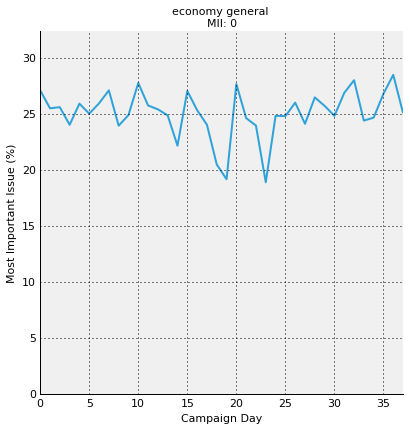
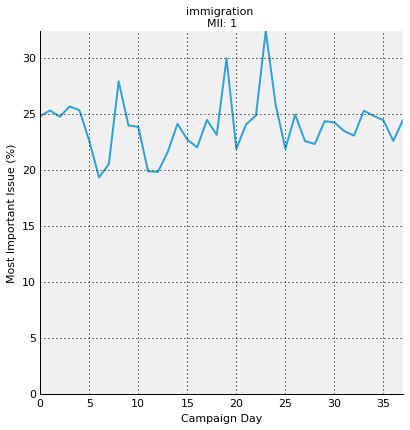
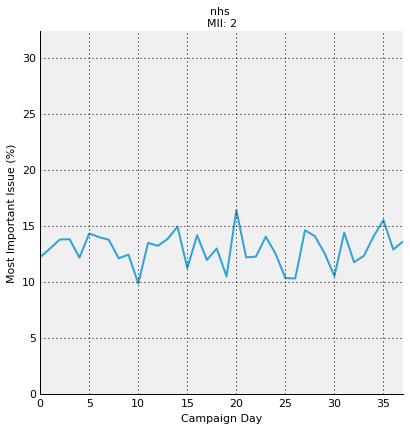
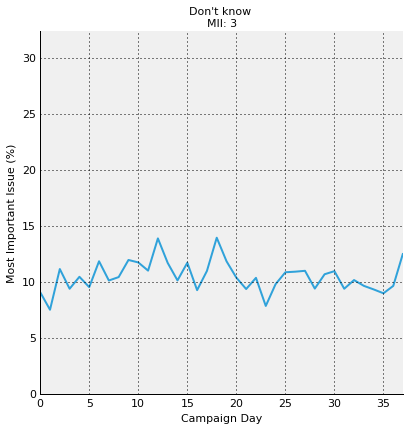
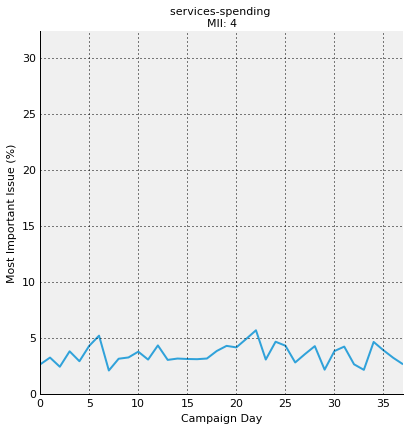
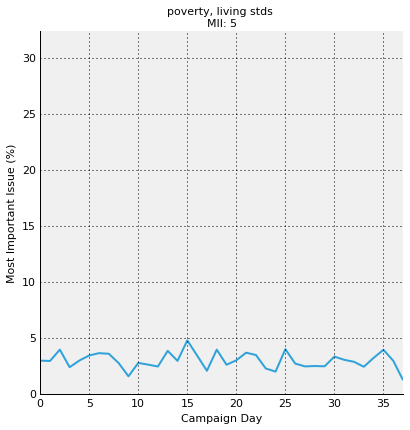
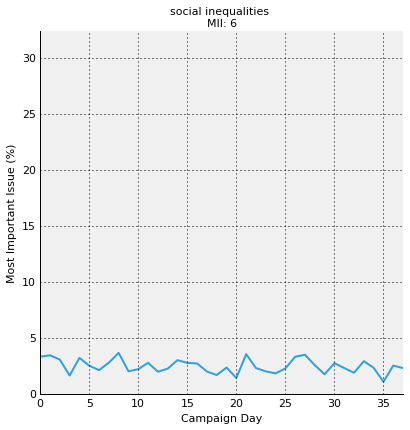
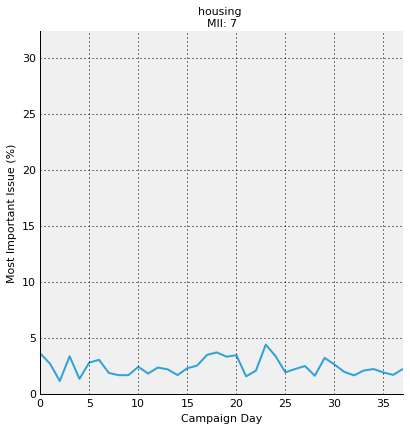
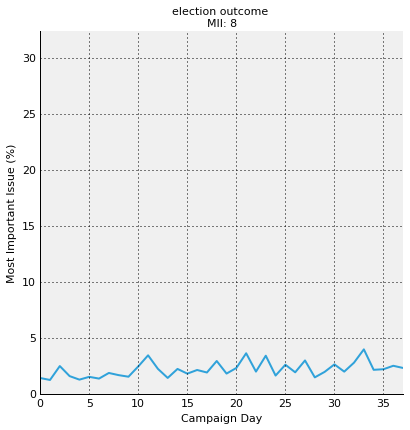
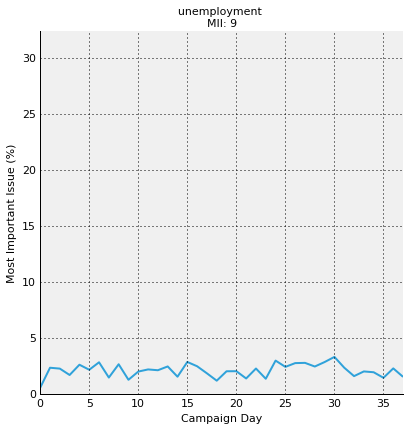
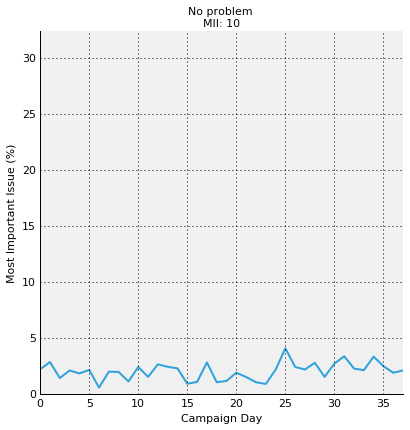
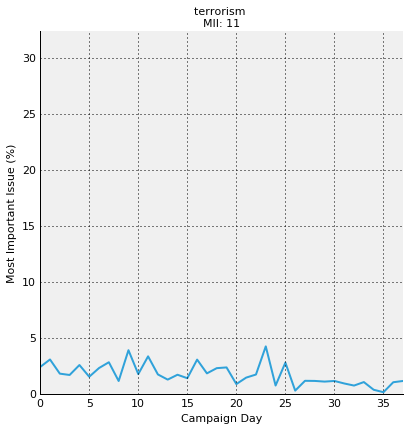
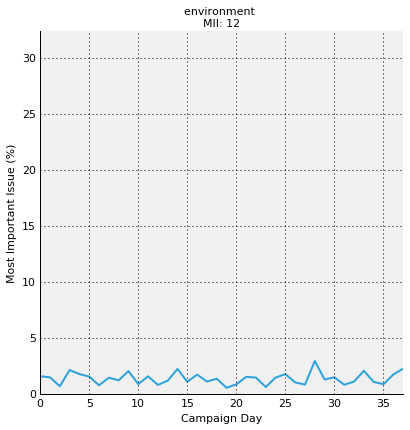
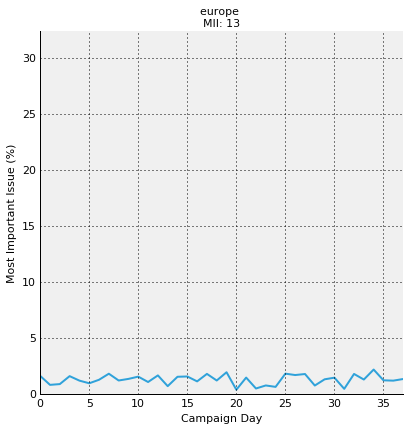
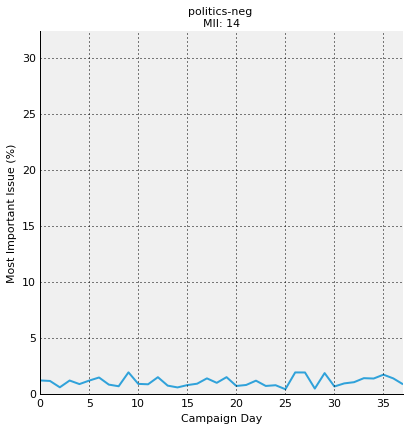
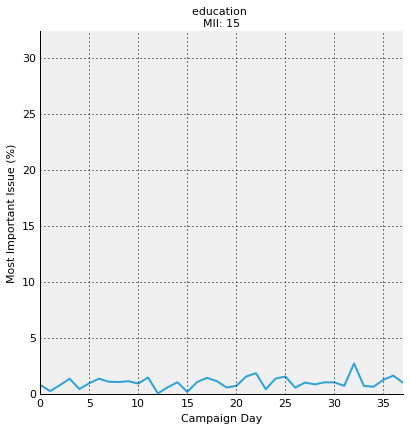
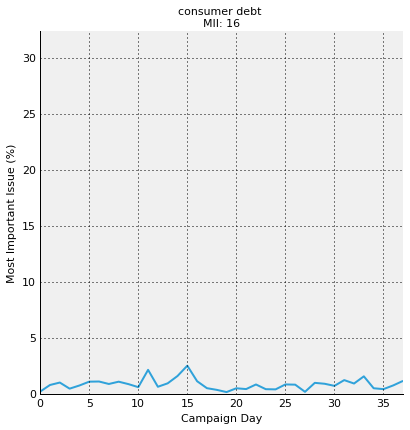
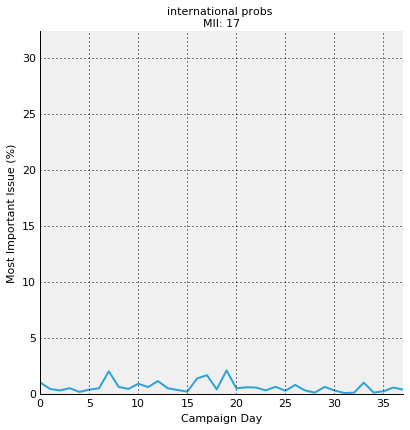
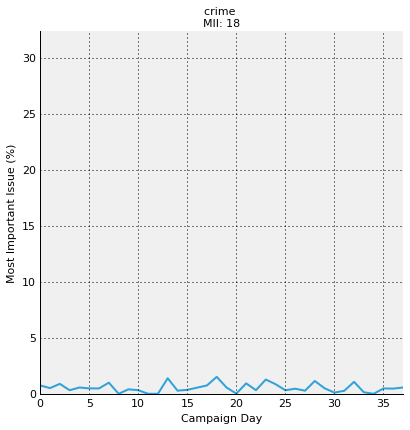
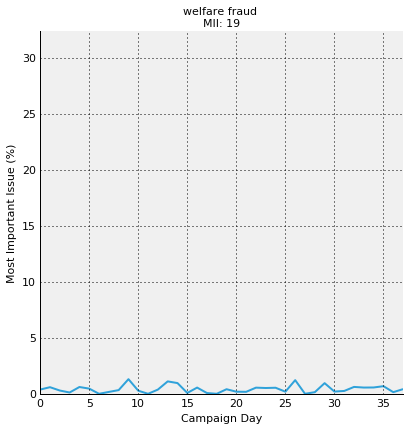
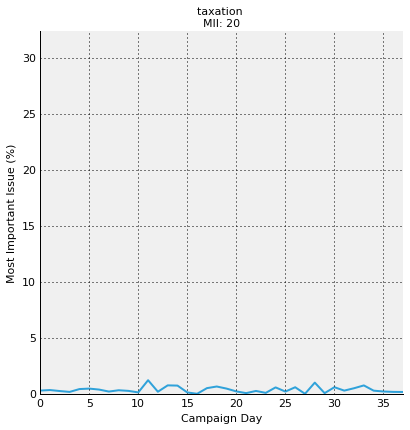
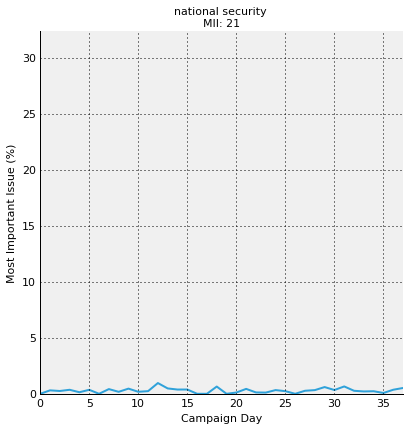
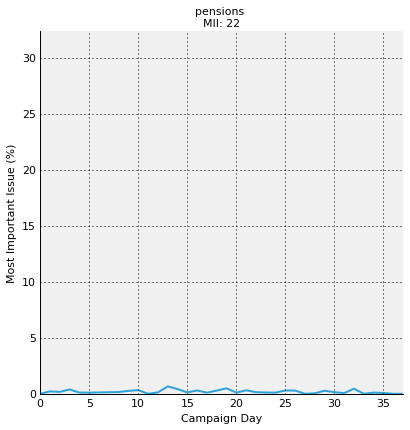
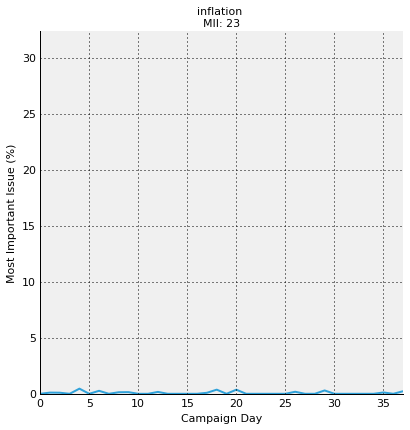
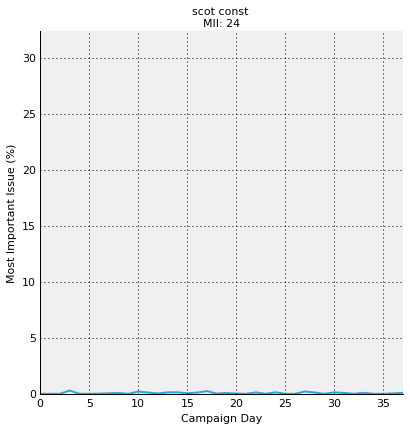
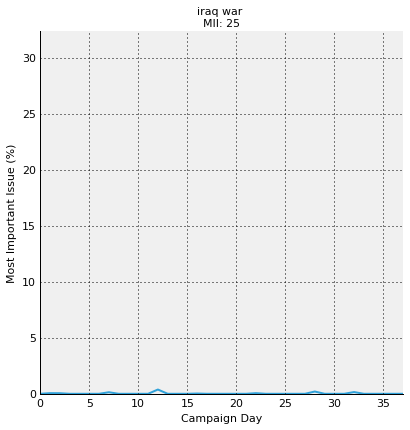
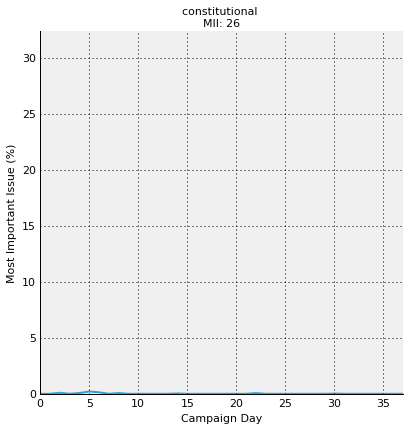
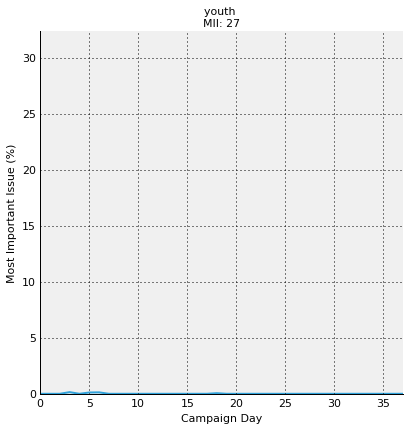
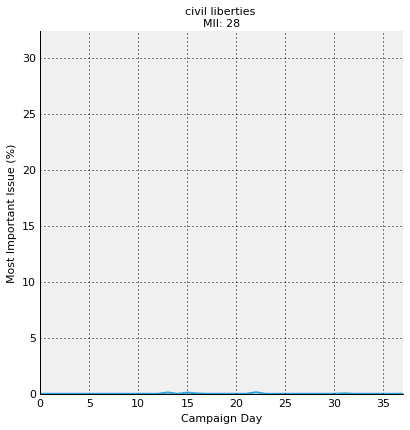
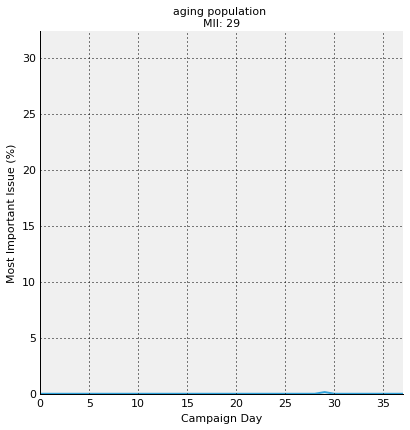
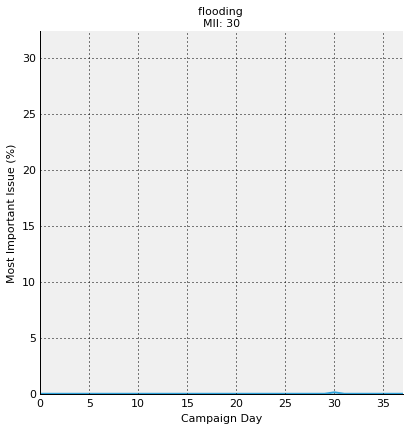
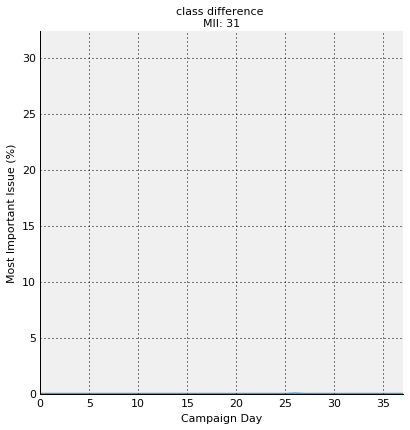

In [7]:
%%output size = 180

x_axis = "Campaign Day"
y_axis = "Most Important Issue"

x_dim = hv.Dimension(x_axis, values = crosstab.index)
y_dim = hv.Dimension(y_axis, unit = '%')

curves = hv.HoloMap(kdims=['MII'])
bars   = hv.HoloMap(kdims=['MII'])
tables = hv.HoloMap(kdims=['MII'])

ordered_columns = crosstab.sum().sort_values(ascending=False).index

for mii in range(0 , len( crosstab.columns) ):

    curves[mii] = hv.Curve(crosstab[ ordered_columns[mii] ] * 100,
                           kdims = [x_dim] ,
                           vdims = [y_dim], label=ordered_columns[mii] )

    tables[mii] = hv.Table( crosstab[ ordered_columns[mii] ] * 100, kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )
    bars[mii]   = hv.Bars( crosstab[ ordered_columns[mii] ] * 100, kdims=[x_dim], vdims =[y_dim], label=ordered_columns[mii] )     
    
curves

In [88]:
# [x for x in BES_Panel.columns if "GovTrust" in x]

['conGovTrustW5',
 'labGovTrustW5',
 'ldGovTrustW5',
 'snpGovTrustW5',
 'pcGovTrustW5',
 'ukipGovTrustW5',
 'grnGovTrustW5']

b':HoloMap   [MII]\n   :Bars   [Campaign Day]   (Most Important Issue)'
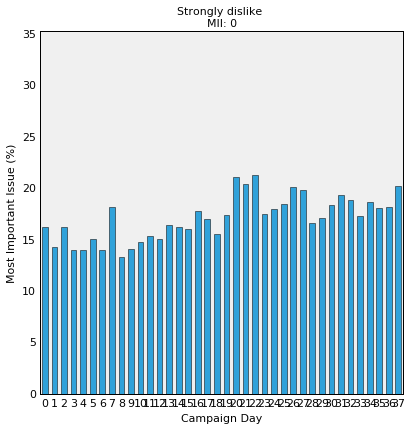
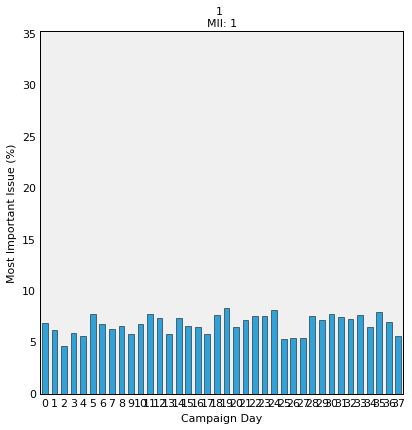
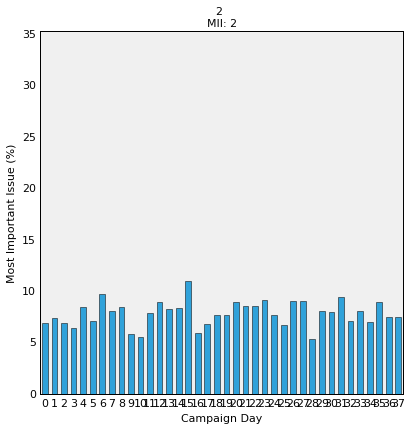
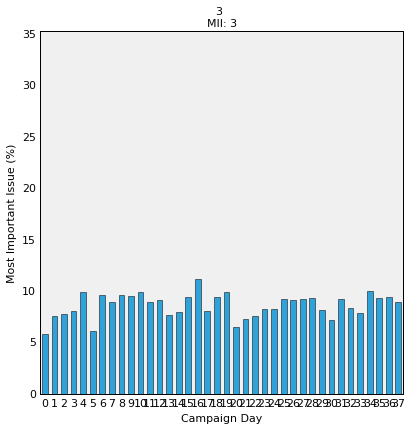
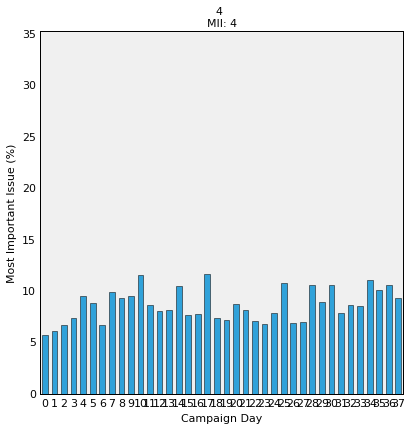
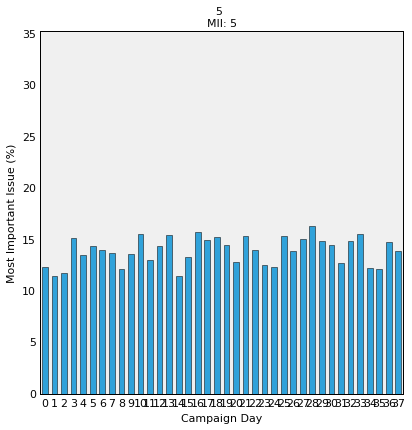
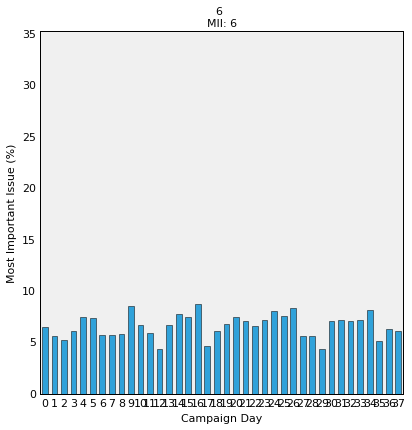
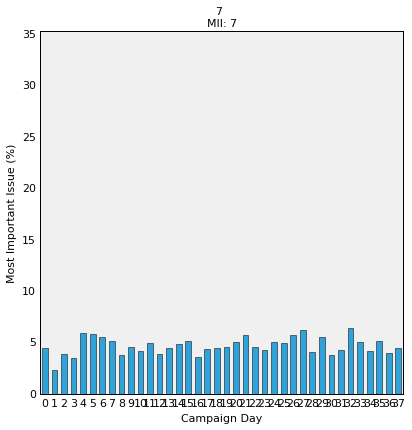
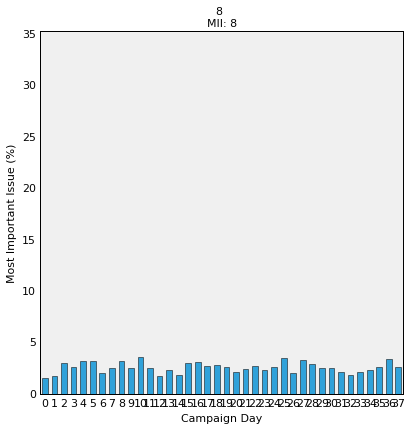
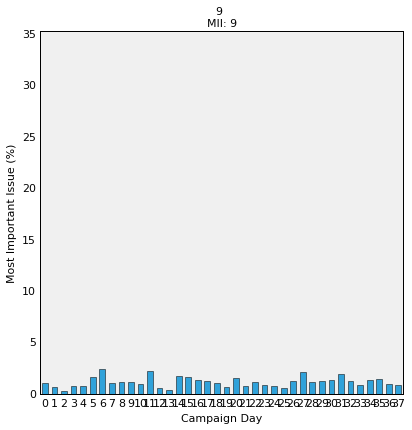
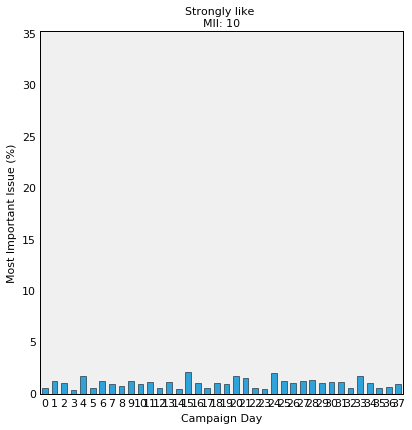
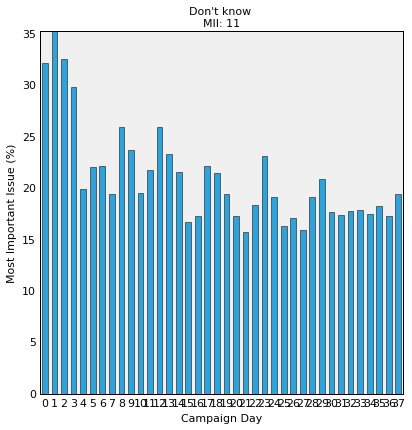

In [66]:
%output size = 180

x_axis = "Campaign Day"
y_axis = "Most Important Issue"

x_dim = hv.Dimension(x_axis, values = crosstab.index)
y_dim = hv.Dimension(y_axis, unit = '%')

curves = hv.HoloMap(kdims=['MII'])
bars   = hv.HoloMap(kdims=['MII'])
tables = hv.HoloMap(kdims=['MII'])

ordered_columns = crosstab.sum().index
#crosstab.sum().sort_values(ascending=False).index

for mii in range(0 , len( crosstab.columns) ):
    lab = str( ordered_columns[mii] )
    curves[mii] = hv.Bars(crosstab[ ordered_columns[mii] ] * 100,
                           kdims = [x_dim] ,
                           vdims = [y_dim] , label = lab)
# 
#     tables[mii] = hv.Table( crosstab[ ordered_columns[mii] ] * 100, kdims = [x_dim], vdims = [y_dim], label = lab )
#     bars[mii]   = hv.Bars(  crosstab[ ordered_columns[mii] ] * 100, kdims = [x_dim], vdims = [y_dim], label = lab )     
    
curves

In [68]:
%output size = 300

b':Bars   [likeBennettW5,CampaignDayW5]   (frequency)'
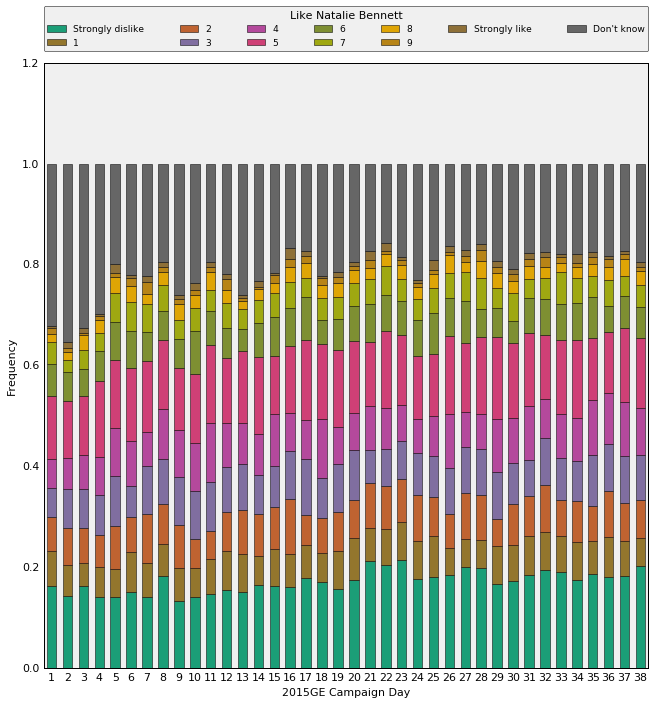

In [69]:
%%opts  Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack']  ]  (color=Palette('Dark2'))  

macro.to.bars(['Like Natalie Bennett', '2015GE Campaign Day'], 'Frequency', [])

In [ ]:
## try same thing on EU referendum campaign

## PROBLEM -> data doesn't exist in Wave 10 (because they had to rush it out? Maybe it's in wave9?)

## Nope - not out yet!

In [ ]:
# key_dimensions   = [('year', 'Year'), ('country', 'Country')]



In [166]:
%%opts  Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack']  ]  (color=Palette('Dark2'))  

corr_vars = corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(21).index

bars     = hv.HoloMap(kdims=['corr_vars'])
tables   = hv.HoloMap(kdims=['corr_vars'])

b = pd.DataFrame(columns = ["Variable","CampaignDayW5","frequency","corr_var"])

for corr_var_no in range(0,len(corr_vars)):
    corr_var = corr_vars[corr_var_no]

    # actual crosstabs of campaign day vs MII
    crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW5' ],
                           columns = BES_Panel[ corr_var ],
                           values  = BES_Panel[ "wt_daily_W5" ],
                           aggfunc = sum,
                           normalize='index')

    a = pd.DataFrame(crosstab.unstack()).reset_index()
    a.columns = [corr_var,"CampaignDayW5","frequency"]
#     a["corr_var"] = corr_var
    
#     b=b.append(a, ignore_index = True)

    key_dimensions   = [('CampaignDayW5', '2015GE Campaign Day'), (corr_var, corr_var)]
    value_dimensions = [('frequency', 'Frequency')]
    tables[corr_var_no] = hv.Table(a, kdims=key_dimensions, vdims=value_dimensions)
    bars[corr_var_no]   = tables[corr_var_no].to.bars([corr_var, '2015GE Campaign Day'], 'Frequency', [])
    print(corr_var)
                         
# bars

postalTurnoutW5
discussPolDaysW5
winConstituencySNPW5
participation_5W5
likeBennettW5
infoSourcePeopleW5
fbInfo_1W5
majorityPartyLabW5
labPartnerSNPW5
fbInfo_3W5
lrgreensW5
fbInfo_2W5
partyContactConW5
lrPCW5
lrSNPW5
majorityPartyConW5
conPartnerSNPW5
noChanceCoalitionSNPW5
noChanceCoalitionLDW5
conToneW5
labPartnerUKIPW5


In [127]:
bars

TypeError: unorderable types: numpy.ndarray() < str()

b':HoloMap   [corr_vars]\n   :Bars   [Variable,CampaignDayW5]   (frequency)'

C:\ANACON~1\envs\BES_analysis\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


b':Bars   [likeBennettW5,CampaignDayW5]   (frequency)'
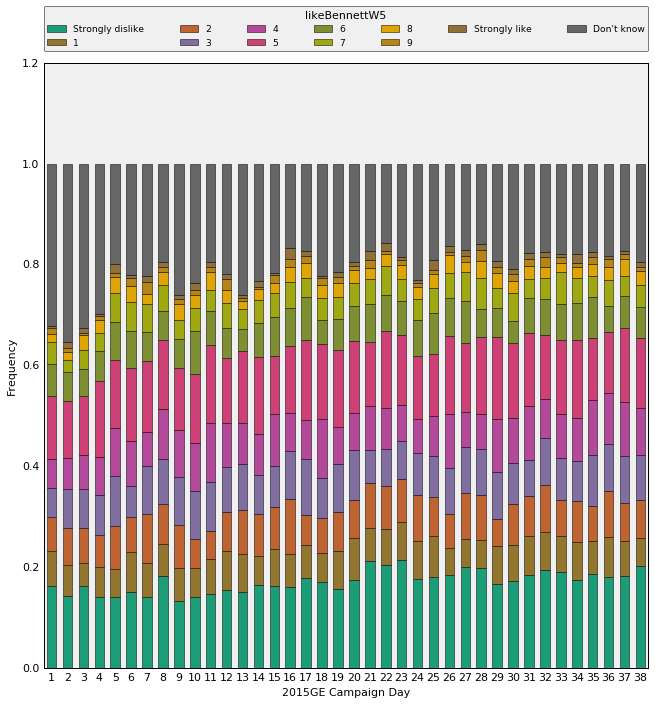

In [170]:
%%opts  Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack']  ]  (color=Palette('Dark2'))
bars[4]

In [ ]:
http://holoviews.org/Tutorials/Elements.html
    
    
values = np.random.rand(5, 20)
percentages = (values/values.sum(axis=0)).T*100

overlay = hv.Overlay([hv.Area(percentages[:, i], vdims=[hv.Dimension('value', unit='%')]) for i in range(5)])
overlay + hv.Area.stack(overlay)

In [148]:
tables[2]["Variable"]

array(['0 - Very unlikely to win', '0 - Very unlikely to win',
       '0 - Very unlikely to win', ..., "Don't know", "Don't know",
       "Don't know"], dtype=object)

In [163]:
BES_Panel[ corr_vars[2] ].cat.ordered

True

In [162]:
a["Variable"].cat.ordered

True

In [9]:
W5cats = [x for x in BES_Panel.columns if ("W5" in x) & (BES_Panel[x].dtype.name =='category')]

In [11]:
W5_cats_df = BES_Panel[W5cats].apply(lambda x : x.cat.codes).replace(-1,np.nan)

In [12]:
sample_size = W5_cats_df.notnull().apply(lambda x: x& BES_Panel[ 'CampaignDayW5' ].notnull()).sum()
corr = W5_cats_df.corrwith(BES_Panel[ 'CampaignDayW5' ])


corr_df = pd.DataFrame(corr, columns= ["corr"])
corr_df["sample_size"] = sample_size
corr_df["absolute corr"] = corr.abs()
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(21)

,corr,sample_size,absolute corr
postalTurnoutW5,0.516387,9001,0.516387
discussPolDaysW5,0.112075,30814,0.112075
winConstituencySNPW5,0.092492,5510,0.092492
participation_5W5,0.090177,30814,0.090177
likeBennettW5,-0.072596,30807,0.072596
infoSourcePeopleW5,0.071934,30813,0.071934
fbInfo_1W5,-0.070760,20497,0.070760
majorityPartyLabW5,-0.069621,30809,0.069621
labPartnerSNPW5,0.069332,12670,0.069332
fbInfo_3W5,-0.062193,20497,0.062193


In [18]:
corr_df[corr_df["sample_size"]>2000].sort_values(by="absolute corr", ascending=False).head(21).index

Index(['postalTurnoutW5', 'discussPolDaysW5', 'winConstituencySNPW5',
       'participation_5W5', 'likeBennettW5', 'infoSourcePeopleW5',
       'fbInfo_1W5', 'majorityPartyLabW5', 'labPartnerSNPW5', 'fbInfo_3W5',
       'lrgreensW5', 'fbInfo_2W5', 'partyContactConW5', 'lrPCW5', 'lrSNPW5',
       'majorityPartyConW5', 'conPartnerSNPW5', 'noChanceCoalitionSNPW5',
       'noChanceCoalitionLDW5', 'conToneW5', 'labPartnerUKIPW5'],
      dtype='object')

In [16]:
corr_vars

Index(['turnoutUKGeneralW5', 'generalElectionVoteW5',
       'generalElectionVotePostW5', 'generalElectionVoteUnsqueezeW5',
       'generalElectionVoteSqueezeW5', 'generalElectionCertaintyUnsqW5',
       'generalElectionCertaintySqW5', 'generalElectionCertaintyW5', 'miiW5',
       'bestOnMIIW5', 'electionInterestW5', 'conGovTrustW5', 'labGovTrustW5',
       'ldGovTrustW5', 'snpGovTrustW5', 'pcGovTrustW5', 'ukipGovTrustW5',
       'grnGovTrustW5', 'likeCameronW5', 'likeMilibandW5', 'likeCleggW5'],
      dtype='object')